<a href="https://colab.research.google.com/github/Prosumidor/courses/blob/master/Actividad_1_Redes_Neuronales_Artificiales_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

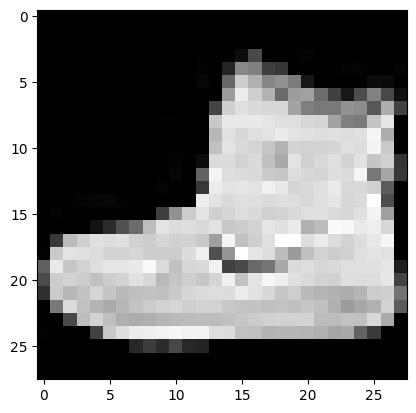

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
# Creamos variables
num_train_images = training_images.shape[0]
num_test_images = test_images.shape[0]

# Obtenemos el tamaño de las imágenes
image_size = training_images.shape[1:]

# Imprimimos la información obtenida
print("Cantidad de imágenes en el conjunto de entrenamiento: ", num_train_images)
print("Cantidad de imágenes en el conjunto de prueba: ", num_test_images)
print("Tamaño de las imágenes: ", image_size)

Cantidad de imágenes en el conjunto de entrenamiento:  60000
Cantidad de imágenes en el conjunto de prueba:  10000
Tamaño de las imágenes:  (28, 28)


Hay 60.000 imágenes en el dataset de entrenamiento, 10.000 en el de test. Las imágenes tienen un tamaño de 28x28.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###
# Exploración de las variables
print("Tamaño del conjunto de entrenamiento (imágenes):", training_images.shape)
print("Tamaño del conjunto de prueba (imágenes):", test_images.shape)
print("Tamaño del conjunto de entrenamiento (etiquetas):", training_labels.shape)
print("Tamaño del conjunto de prueba (etiquetas):", test_labels.shape)
print("Tipo de datos de las imágenes:", training_images.dtype)
print("Tipo de datos de las etiquetas:", training_labels.dtype)
print("Valores únicos en las etiquetas:", np.unique(training_labels))
print("Cantidad de clases:", len(np.unique(training_labels)))

Tamaño del conjunto de entrenamiento (imágenes): (60000, 28, 28)
Tamaño del conjunto de prueba (imágenes): (10000, 28, 28)
Tamaño del conjunto de entrenamiento (etiquetas): (60000,)
Tamaño del conjunto de prueba (etiquetas): (10000,)
Tipo de datos de las imágenes: float64
Tipo de datos de las etiquetas: uint8
Valores únicos en las etiquetas: [0 1 2 3 4 5 6 7 8 9]
Cantidad de clases: 10


Se muestra el tamaño de los conjuntos de entrenamiento y prueba, así como el tipo de datos de las imágenes y las etiquetas. Además, se muestra la cantidad de valores únicos en las etiquetas, que corresponde al número de clases en el conjunto de datos MNIST, que en este caso son los dígitos del 0 al 9, correspondientes a 10 tipos diferentes de ropa.

In [ ]:
# Definir las etiquetas correspondientes a cada clase
class_names = {
    0: "Camiseta/top",
    1: "Pantalón",
    2: "Suéter",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Zapatilla de deporte",
    8: "Bolso",
    9: "Botín"
}

# Mostrar la cantidad de datos de entrenamiento y prueba para cada clase
import pandas as pd
data = []
for label, class_name in class_names.items():
    train_count = np.sum(training_labels == label)
    test_count = np.sum(test_labels == label)
    data.append([label, class_name, train_count, test_count])

df = pd.DataFrame(data, columns=['Clase', 'Nombre de Clase', 'Entrenamiento', 'Prueba'])
print(df)

   Clase       Nombre de Clase  Entrenamiento  Prueba
0      0          Camiseta/top           6000    1000
1      1              Pantalón           6000    1000
2      2                Suéter           6000    1000
3      3               Vestido           6000    1000
4      4                Abrigo           6000    1000
5      5              Sandalia           6000    1000
6      6                Camisa           6000    1000
7      7  Zapatilla de deporte           6000    1000
8      8                 Bolso           6000    1000
9      9                 Botín           6000    1000


Hay 6.000 imágenes de cada tipo en el dataset de entrenamiento (60.000 en total) y 1.000 en el de prueba (10.000 en total).

In [ ]:
import matplotlib.pyplot as plt

def show_images(training_images,
            	class_names,
            	train_labels,
            	nb_samples = 12, nb_row = 4):
    
	plt.figure(figsize=(12, 12))
	for i in range(nb_samples):
    	plt.subplot(nb_row, nb_row, i + 1)
    	plt.xticks([])
    	plt.yticks([])
    	plt.grid(False)
    	plt.imshow(training_images[i], cmap=plt.cm.binary)
    	plt.xlabel(class_names[training_labels[i][0]])
	plt.show()
 class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [ ]:
### Tu código para la red neuronal de la pregunta 2 aquí ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
num_classes = 10
input_shape = (784,)  # 28x28 = 784

# Aplanar las imágenes y convertir las etiquetas a one-hot encoding
training_images = training_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la información del modelo
model.summary()

# Entrenar el modelo
batch_size = 64
epochs = 10
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.5965 - accuracy: 0.8025 - val_loss: 0.4663 - val_accuracy: 0.8358
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.4126 - accuracy: 0.8530 - val_loss: 0.4174 - val_accuracy: 0.8514
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3742 - accuracy: 0.8667 - val_loss: 0.3987 - val_accuracy: 0.8555
Epoch 4/10
938/9

Este código define una red neuronal con una capa oculta (hidden layer) de tamaño 128 con función de activación sigmoid, y una capa de salida con función de activación softmax para la clasificación multiclase. Utiliza el optimizador Adam para la optimización del modelo. Durante el entrenamiento, se muestra la pérdida (loss) y la precisión (accuracy) en cada epoch. El modelo se entrena durante 10 epochs con un batch size de 64, y luego se evalúa en el conjunto de prueba. El modelo supera el 80% de accuracy en el conjunto de prueba en todas las iteraciones, alcanzando casi el 90% en la última.

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

In [ ]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

Pérdida en el conjunto de prueba: 0.337945818901062
Precisión en el conjunto de prueba: 0.8791999816894531



## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [ ]:
### Tu código del clasificador de la pregunta 3 aquí ###
# Obtener las clasificaciones de las imágenes de prueba
classifications = model.predict(test_images)

# Imprimir la primera entrada en las clasificaciones
print('Clasificación de la primera imagen en el conjunto de prueba:', classifications[0])

313/313 [==============================] - 2s 6ms/step
Clasificación de la primera imagen en el conjunto de prueba: [3.1458796e-06 4.3785835e-07 1.1750638e-05 1.4547151e-05 8.0252303e-06 3.2272249e-02 3.0358329e-05 3.4877427e-02 4.9514486e-04 9.3228692e-01]


**Respuesta a la pregunta 3.1**

El vector de números que se obtiene al imprimir la primera entrada en las clasificaciones es un vector de probabilidades. Cada valor en el vector representa la probabilidad de que la imagen correspondiente en el conjunto de prueba pertenezca a una determinada clase de Fashion MNIST. La razón por la que se obtiene un vector de probabilidades en lugar de una etiqueta única es porque se utilizó una función de activación softmax en la capa de salida del modelo. La función softmax convierte las salidas de la red neuronal en una distribución de probabilidad, donde la suma de todas las probabilidades es igual a 1. Cada valor en el vector de probabilidades representa la probabilidad de que la imagen sea clasificada en una clase específica.
El vector de números que se obtiene al imprimir la primera entrada en las clasificaciones es un vector de probabilidades. Cada valor en el vector representa la probabilidad de que la imagen correspondiente en el conjunto de prueba pertenezca a una determinada clase de Fashion MNIST. La razón por la que se obtiene un vector de probabilidades en lugar de una etiqueta única es porque se utilizó una función de activación softmax en la capa de salida del modelo. La función softmax convierte las salidas de la red neuronal en una distribución de probabilidad, donde la suma de todas las probabilidades es igual a 1. Cada valor en el vector de probabilidades representa la probabilidad de que la imagen sea clasificada en una clase específica.

**Respuesta a la pregunta 3.2**

In [ ]:
import numpy as np

# Obtener el índice con la probabilidad más alta en el vector de probabilidades
pred_class_index = np.argmax(classifications[0])

# Obtener la etiqueta/clase equivalente al índice
pred_class = class_names[pred_class_index]

# Imprimir la clase predicha
print('Clase predicha para la primera imagen en el conjunto de prueba:', pred_class)

Clase predicha para la primera imagen en el conjunto de prueba: Botín


Para obtener la etiqueta de clasificación única, se puede utilizar la función argmax() de NumPy para encontrar el índice con la probabilidad más alta en el vector de probabilidades. Ese índice corresponderá a la clase predicha para la imagen. La clase de la primera entrada en la variable classifications corresponde a la clase predicha para la primera imagen en el conjunto de prueba de Fashion MNIST. Esta clase se puede obtener utilizando la función argmax() de NumPy, que devuelve el índice con el valor más alto en un vector de números. En este código, class_names es una lista que contiene las etiquetas/clases equivalentes a los valores numéricos en Fashion MNIST, que van del 0 al 9. La variable pred_class contendrá la etiqueta/clase equivalente a la clase predicha para la primera imagen en el conjunto de prueba.

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

In [ ]:
### Tu código para 512 neuronas aquí ###
# Definimos la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilamos el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostramos la información del modelo
model.summary()

# Entrenamos el modelo
batch_size = 64
epochs = 10
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.5294 - accuracy: 0.8133 - val_loss: 0.4546 - val_accuracy: 0.8342
Epoch 2/10
938/938 [==============================] - 11s 11ms/step - loss: 0.4032 - accuracy: 0.8539 - val_loss: 0.4242 - val_accuracy: 0.8480
Epoch 3/10
938/938 [==============================] - 11s 11ms/step - loss: 0.3634 - accuracy: 0.8683 - val_loss: 0.3887 - val_accuracy: 0.8589
Epoch 4/10
9

In [ ]:
### Tu código para 1024 neuronas aquí ###
# Definimos la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(1024, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilamos el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostramos la información del modelo
model.summary()

# Entrenamos el modelo
batch_size = 64
epochs = 10
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              803840    
                                                                 
 dense_9 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 21s 20ms/step - loss: 0.5271 - accuracy: 0.8120 - val_loss: 0.4512 - val_accuracy: 0.8360
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.4011 - accuracy: 0.8562 - val_loss: 0.4185 - val_accuracy: 0.8491
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 0.3674 - accuracy: 0.8651 - val_loss: 0.4308 - val_accuracy: 0.8450
Epoch 4/10
9

**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

In [ ]:
#Tu respuesta a la pregunta 4.1 aquí:

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [ ]:
### Tu código del clasificador de la pregunta 4 aquí ###
# Obtener el índice con la probabilidad más alta en el vector de probabilidades
pred = model.predict(test_images)
class_idx = np.argmax(pred[0])

# Obtener la etiqueta/clase equivalente al índice
pred_class = class_names[class_idx]

# Imprimir la clase predicha
print('Clase predicha para la primera imagen en el conjunto de prueba:', pred_class)

313/313 [==============================] - 2s 5ms/step
Clase predicha para la primera imagen en el conjunto de prueba: Botín


Tu respuesta a la pregunta 4.2 aquí:

**Respuesta a la pregunta 4.3:**

*   Tamaño del modelo: Es posible que el tamaño del modelo sea demasiado grande en comparación con la complejidad del problema. Si el modelo es demasiado complejo, puede aprender a ajustarse en exceso a los datos de entrenamiento y clasificar todas las imágenes en la misma clase sin generalizar bien a nuevas imágenes.
*   Funciones de activación: La elección de la función de activación en las capas de la red neuronal también puede tener un impacto en la capacidad del modelo para aprender representaciones adecuadas de los datos. Algunas funciones de activación, como la función sigmoide, pueden tener problemas de saturación en ciertos rangos de valores, lo que puede resultar en una pérdida de información y afectar la capacidad del modelo para discriminar entre diferentes clases.
*   Otros hiperparámetros: Además del tamaño del modelo y las funciones de activación, otros hiperparámetros, como la tasa de aprendizaje, el número de epochs, el tamaño del lote (batch size), entre otros, también pueden afectar el rendimiento del modelo. Es posible que sea necesario ajustar estos hiperparámetros para obtener un mejor rendimiento en la clasificación de imágenes.

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [ ]:
### Tu código de la red neuronal sin capa flatten de la pregunta 5 aquí ###
# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
num_classes = 10
input_shape = (784,)  # 28x28 = 784

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la información del modelo
model.summary()

# Entrenar el modelo
batch_size = 64
epochs = 10
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: ignored

**Respuesta a la pregunta 5:**

Si se quita la capa de aplanamiento (flatten) en una red neuronal que se entrena con imágenes, se producirá un error de forma (shape error) al intentar alimentar las imágenes en la red. Esto se debe a que la capa de aplanamiento es responsable de convertir la representación bidimensional de las imágenes en una representación unidimensional que puede ser procesada por las capas posteriores de la red neuronal.

En el caso específico del código proporcionado anteriormente, la capa de aplanamiento (flatten) se encuentra después de la capa de convolución y antes de la capa completamente conectada (dense). Su propósito es convertir la salida de la capa de convolución en una representación plana (unidimensional) que puede ser alimentada a la capa completamente conectada para la clasificación final. Si se quita esta capa de aplanamiento, se producirá un error en la forma de los datos de entrada en la capa completamente conectada, ya que espera una representación plana pero recibiría una representación bidimensional de las imágenes de entrada.

Por lo tanto, es importante mantener la capa de aplanamiento en la arquitectura de la red si se están utilizando imágenes como entrada para asegurar que los datos se procesen correctamente y se evite cualquier error de forma durante el entrenamiento o evaluación del modelo.

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
num_classes = 10
input_shape = (784,)  # 28x28 = 784

# Aplanar las imágenes y convertir las etiquetas a one-hot encoding
training_images = training_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=input_shape))
model.add(Dense(5, activation='softmax'))

# Compilar el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la información del modelo
model.summary()

# Entrenar el modelo
batch_size = 64
epochs = 10
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 5)                 645       
                                                                 
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: ignored

**Respuesta a la pregunta 6.1:**

El número de neuronas en la última capa de la red neuronal se establece en 10 porque el conjunto de datos utilizado consta de 10 clases diferentes de prendas de vestir. Cada neurona en la capa de salida representa una clase específica, y la función de activación "softmax" se utiliza para obtener una distribución de probabilidad sobre las clases de salida. La clase con la probabilidad más alta se considera como la predicción final de la red para una imagen dada.

**Respuesta a la pregunta 6.2:**

Si se tuviera un número diferente de neuronas en la última capa de la red neuronal en comparación con el número de clases en el conjunto de datos, tendría algunas implicaciones:

*   Error en la representación de las clases: Si se utiliza un número mayor o menor de neuronas en la capa de salida en comparación con el número de clases reales en el conjunto de datos, la red neuronal no sería capaz de representar adecuadamente todas las clases. Por ejemplo, si se usan solo 5 neuronas en la capa de salida para un conjunto de datos con 10 clases, habría una pérdida de información y algunas clases no serían representadas correctamente.
*   Dificultad en la interpretación de las predicciones: El uso de un número incorrecto de neuronas en la capa de salida puede dificultar la interpretación de las predicciones del modelo. Si se usan más neuronas de las necesarias, las predicciones pueden ser menos confiables y más difíciles de entender en términos de qué clase específica se está prediciendo.
*   Impacto en el rendimiento del modelo: El uso de un número inapropiado de neuronas en la capa de salida puede tener un impacto en el rendimiento del modelo. Si se usan menos neuronas de las necesarias, el modelo puede tener una capacidad de representación limitada y puede tener dificultades para alcanzar un alto nivel de precisión. Por otro lado, si se usan más neuronas de las necesarias, el modelo puede volverse más complejo y requerir más recursos computacionales para su entrenamiento y predicción.

Por tanto, es importante asegurarse de que el número de neuronas en la última capa de la red neuronal coincida con el número de clases en el conjunto de datos para garantizar una representación adecuada de las clases, una interpretación clara de las predicciones y un rendimiento óptimo del modelo.

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###
# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
num_classes = 10
input_shape = (784,)  # 28x28 = 784

# Aplanar las imágenes y convertir las etiquetas a one-hot encoding
training_images = training_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la información del modelo
model.summary()

# Entrenar el modelo
batch_size = 64
epochs = 15
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 17s 17ms/step - loss: 0.5927 - accuracy: 0.8046 - val_loss: 0.4637 - val_accuracy: 0.8332
Epoch 2/15
938/938 [==============================] - 25s 27ms/step - loss: 0.4105 - accuracy: 0.8545 - val_loss: 0.4228 - val_accuracy: 0.8494
Epoch 3/15
938/938 [==============================] - 21s 23ms/step - loss: 0.3727 - accuracy: 0.8668 - val_loss: 0.3972 - val_accuracy: 0.8613
Epoch 4/15


In [ ]:
### Tu código para 30 epoch aquí ###
### Tu código para 15 epoch aquí ###
# Cargar el conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
num_classes = 10
input_shape = (784,)  # 28x28 = 784

# Aplanar las imágenes y convertir las etiquetas a one-hot encoding
training_images = training_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la información del modelo
model.summary()

# Entrenar el modelo
batch_size = 64
epochs = 30
history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_images, test_labels))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
  1/938 [..............................] - ETA: 38:36 - loss: 2.5257 - accuracy: 0.0938

KeyboardInterrupt: ignored

**Respuesta a la pregunta 7.3**:

Cuando llegamos a un número de epochs en el que el valor de pérdida deja de disminuir y a veces aumenta, esto puede indicar que el modelo ha alcanzado su capacidad de aprendizaje óptima en los datos de entrenamiento y no está mejorando más. Este efecto se conoce como sobreajuste (overfitting) o sobreentrenamiento.

El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, capturando ruido o detalles insignificantes en los datos en lugar de aprender patrones generales que se puedan aplicar a datos no vistos. Como resultado, el rendimiento del modelo puede degradarse en datos de prueba o en nuevos datos.

El sobreajuste puede ocurrir cuando se utiliza un número excesivo de epochs en el entrenamiento del modelo. A medida que el modelo sigue ajustando sus pesos a los datos de entrenamiento, la pérdida en los datos de entrenamiento puede seguir disminuyendo. Sin embargo, llega a un punto en el que el modelo se vuelve demasiado especializado en los datos de entrenamiento y su capacidad de generalización a datos no vistos disminuye. Esto se refleja en un aumento de la pérdida en los datos de prueba o en nuevos datos.

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
from tensorflow.keras.callbacks import Callback

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.40:
            print("\nAlcanzado el 40% de precisión, se cancela el entrenamiento!!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.12.0
Epoch 1/50
   2/1875 [..............................] - ETA: 40:11 - loss: 2.2571 - accuracy: 0.2031

1868/1875 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.8309
Alcanzado el 40% de precisión, se cancela el entrenamiento!!
1875/1875 [==============================] - 64s 33ms/step - loss: 0.4722 - accuracy: 0.8309


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto